In [1]:
from matplotlib import pyplot as plt
from random import random
plt.rcParams.update({'pdf.fonttype': 'truetype'})

In [2]:
def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 194464336.77843493, #1.1539564110413285, #194464336.77843493, #81687578.7624796, #
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

In [3]:
used_cars_boosting_rule=r"$\bf{SOTA: Stagewise Gradient Boosting}$"+'''
$+10488$ if True
$+15920$ if PS$\geq$160 & year$\geq$2011
$-7284$   if PS$\leq$220 & year$\leq$2005
$+6680$   if count$\leq$149 & PS$\geq$220 & year$\geq$2005
$-2733$   if PS$\leq$80
$+6675$   if PS$\geq$80 & year$\geq$2015
$+3105$   if count$\leq$18 & PS$\geq$160 & 2000$\leq$year$\leq$2011
$-5891$   if km$\geq$50k & PS$\geq$160 & year$\geq$2011
$+1686$   if km$\leq$125k & PS$\geq$120 & year$\geq$2008
$+1902$   if km$\geq$50k & PS$\leq$220 & 2000$\leq$year$\leq$2005
$-2270$   if PS$\leq$120 & PS$\leq$160 & 2005$\leq$year$\leq$2011
$ -834$     if count$\geq$69 & year$\leq$2008
$+3805$   if PS$\leq$80 & year$=$2005'''
used_cars_orth_rule=r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$+9614$   if True
$+6129$   if count$\leq$149 & PS$\geq$160 & year$\geq$2008
$-1887$   if PS$\leq$160 & year$\leq$2008
$+10020$ if km$\leq$125k & PS$\geq$120 & year$\geq$2011
$+5940$   if count$\leq$32 & PS$\geq$220 & year$\geq$2005
$-3752$   if PS$\leq$220 & year$\leq$2005
$-5675$   if 50k$\leq$km$\leq$125k & 120$\leq$PS$\leq$220
$-2914$   if PS$\leq$120 & year$\leq$2011'''

banknote_boosting_rule='''Gradient Boosting:
- 3.03 if var$\geq$1.24
+3.47 if skew$\leq$7.62 & var$\leq$-0.50
+5.65 if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
- 4.01 if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
- 5.38 if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
+3.41 if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
- 3.92 if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
- 2.76 if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
+5.05 if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 
         & 1.24$\leq$var$\leq$3.38
- 3.47 if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
banknote_orth_rule = '''Proposed algorithm:
- 4.80 if var$\geq$1.24
+5.20 if skew$\leq$7.62 & var$\leq$-0.50
+7.68 if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
- 4.36 if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
- 6.81 if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
+3.34 if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
x=81687578.7624796/194464336.77843493
x

0.4200645738737753

In [4]:
import numpy as np
bank_sirus_comp=np.cumsum([2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,2,2,3,2,3,3,3,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3])
bank_sirus_train=[1.0000000,0.8457616,0.8554199,0.8402569,0.8336402,0.8407069,0.8430264,0.8432240,0.8476775,
0.8447023,0.8471400,0.8453785,0.8471116,0.8486667,0.8482915,0.8497574,0.8504846,0.8517341,
0.8521353,0.8507546,0.8538248,0.8525157,0.8523542,0.8521450,0.8539293,0.8536963,0.8543751,
0.8546353,0.8538218,0.8539122,0.8499622,0.8527685,0.8516955,0.8519916,0.8528138,0.8508883,
0.8490368,0.8496360,0.8499764,0.8486021,0.8484732,0.8504235,0.8491191,0.8492093,0.8495956,
0.8495205,0.8515217,0.8494077,0.8498719,0.8502503,0.8504190]
bank_sirus_test=[1.0000000,0.8457770,0.8563435,0.8415495,0.8356448,0.8431540,0.8453514,0.8455284,0.8498098,
0.8476470,0.8492228,0.8470909,0.8493657,0.8514621,0.8505370,0.8521289,0.8526348,0.8541204,
0.8544173,0.8530394,0.8561517,0.8549817,0.8547452,0.8544461,0.8563708,0.8561704,0.8568506,
0.8570256,0.8565116,0.8566705,0.8524966,0.8554407,0.8542797,0.8545019,0.8555264,0.8532700,
0.8516675,0.8523697,0.8526801,0.8511794,0.8510926,0.8534752,0.8519732,0.8521046,0.8525117,
0.8524180,0.8544382,0.8524735,0.8527148,0.8530158,0.8531612,0.8525395]
used_cars_sirus_comp=[0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
                 81, 84, 87, 90, 93, 96, 99, 102]
used_cars_sirus_train=[1, 0.9994350, 0.8696765, 0.8626640, 0.8440756, 0.7515519, 0.7558351, 0.7556530,
    0.6891838, 0.6827963, 0.6757399, 0.6757356, 0.6668457, 0.6668479, 0.6668457,
    0.6593183, 0.6593379, 0.6606534, 0.6604860, 0.6425454, 0.6379903, 0.6380648,
    0.6367842, 0.6369410, 0.5981340, 0.5784931, 0.5784822, 0.5785450, 0.5785502,
    0.5785502, 0.5576540, 0.5566320, 0.5762792, 0.5567980, 0.5544311, 0.5544229,
    0.5543182, 0.5433708, 0.5509874, 0.5511007, 0.5432737, 0.5434794, 0.5434788,
    0.5442668, 0.5428193, 0.5522481, 0.5421468, 0.5354273, 0.5421665, 0.5334900,
    0.5343200, 0.5377863]
used_cars_sirus_test=[0.9971751, 0.8632818, 0.8556711, 0.8556092, 0.8299741, 0.8306051, 0.8293350, 0.8315003, 0.8315006,
    0.8315006, 0.8315005, 0.8314101, 0.8334764, 0.8334761, 0.8353698, 0.8380277, 0.8380255, 0.8383163,
    0.8381883, 0.8347613, 0.8482547, 0.8550078, 0.8392419, 0.8588412, 0.8608018, 0.8608198, 0.8499406,
    0.8970128, 0.9015498, 0.9014993, 0.9014991, 0.9317368, 0.9038972, 0.9039428, 0.9482345, 0.9371175,
    0.9434899, 0.9334921, 0.9342142, 0.9384535, 0.9520204, 0.9520513, 0.9515842, 0.9522726, 0.9522737,
    1.0169144, 0.9517031, 0.9632834, 0.9413457, 0.9452707, 0.9182855, 1.0162028]

In [5]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=100, title=None, reps=[0,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[]):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, squeeze=False, figsize=(4.4,4))
    for p in range(1):
        ax=axs[0, p]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        max_risk=get_max_risk(dataset_name)
        
        objs = ['gpe']#['mwg','gpe','orth'] if p==0 else ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search=''#'exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
            print(search)
            max_risk = get_max_risk(dataset_name) 
            print('max risk',obj, max_risk)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 30)
                    fc_test=[0]*(50 if p==0 else 30)
                    ands = [0]*(50 if p==0 else 30)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(reps[p] if obj!='mwg' else reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
#         ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], ':', color='purple', linewidth=1.1, where='post')
#         ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
#                  linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
        label_map={'gpe_boosting_':'GB' if p==0 else 'GB', 
                   'orth_fc_Newton-CG': 'COB', 'xgb_keep_': 'XGB', 
                  'mwg_boosting_':'GS'}
        for item in train_risks:
            i+=1
            max_risk = get_max_risk(dataset_name) #if 'orth'  in item else 1.1539564110413285
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
            print(item, train_risks[item])
            print(item, test_risks[item])
            print(item, and_counts[item])
            
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
            print(item, 'auc:', aucs[item])
            last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+train_risks[item][:last_index], ':', color=colours[item],
                     linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
            ax.step([0,1]+and_counts[item][:last_index], [1,.42]+test_risks[item][:last_index], color=colours[item],
                     label=label_map[item],linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
        ax.set_xlabel('Complexity', fontsize=8)
        ax.set_xlim(0,max_length)
        if p==0:
            ax.set_ylabel('Risk', fontsize=8)
        ax.set_yscale('log')
        ax.plot([],[], ':', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
#         ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
#                     xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
#                      arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
#                                      connectionstyle="arc3", facecolor='black'))
#         ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
#                     xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
#                      arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
#                                      connectionstyle="arc3", facecolor='black'))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim([0.0009, 1.1])
            ax.legend(handlelength=1, ncol=1,bbox_to_anchor=(legend_locations[p][0],legend_locations[p][1]), prop = { "size": 6 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
#         ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=7)
#         ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=7)
#         ax.set_title(dataset_name.replace('_', ' '), fontsize=10)
        ax.text(40,0.9,dataset_name.replace('_', ' '), fontsize=9)
#         ax.grid(visible=True, which='major')
#         ax.grid(visible=True, which='minor')
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs




max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3
gpe_boosting_ [0.24333904502491474, 0.13984820905069836, 0.10417314689598901, 0.09394077639790885, 0.08905279325047262, 0.08564925145476089, 0.07090325216387706, 0.06677253381705783, 0.0634197763742015, 0.058815441482922816, 0.05797679402026709, 0.056977798997611115, 0.05572515817611516, 0.05018749919631185, 0.048041700074253846, 0.04578300363084208, 0.045583361008258584, 0.04481753905726182, 0.043854758407366114, 0.03942372756977987, 0.03834803965102027, 0.037571946531319476, 0.036855111971905045, 0.036423241206874096, 0.035995053156968694, 0.03569787323409608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
gpe_boosting_ [0.29282009404014014, 0.17967331528693806, 0.11782709475049565, 0.10715660159400599, 0.09241840289807748, 0.086686894847208, 0.07542587714031367, 0.06432165829533747, 0.

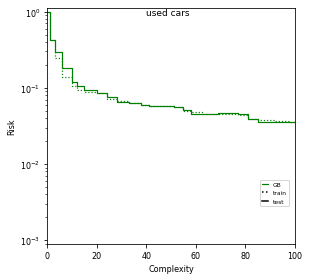

In [6]:
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_1.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.00095],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[46.2, 0.059]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.039]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])

In [7]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=100, title=None, reps=[0,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[]):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, squeeze=False, figsize=(4.4,4))
    for p in range(1):
        ax=axs[0, p]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        max_risk=get_max_risk(dataset_name)
        
        objs = ['gpe']#['mwg','gpe','orth'] if p==0 else ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search=''#'exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
            print(search)
            max_risk = get_max_risk(dataset_name) 
            print('max risk',obj, max_risk)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 30)
                    fc_test=[0]*(50 if p==0 else 30)
                    ands = [0]*(50 if p==0 else 30)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(reps[p] if obj!='mwg' else reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
#         ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], ':', color='purple', linewidth=1.1, where='post')
#         ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
#                  linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
        label_map={'gpe_boosting_':'GB' if p==0 else 'GB', 
                   'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
                  'mwg_boosting_':'GS'}
        for item in train_risks:
            i+=1
            max_risk = get_max_risk(dataset_name) #if 'orth'  in item else 1.1539564110413285
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
            print(item, train_risks[item])
            print(item, test_risks[item])
            print(item, and_counts[item])
            
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
            print(item, 'auc:', aucs[item])
            last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+train_risks[item][:last_index], ':', color=colours[item],
                     linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+test_risks[item][:last_index], color=colours[item],
                     label=label_map[item],linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
        ax.set_xlabel('Complexity', fontsize=8)
        ax.set_xlim(0,max_length)
        if p==0:
            ax.set_ylabel('Risk', fontsize=8)
        ax.set_yscale('log')
        ax.plot([],[], ':', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
#         ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
#                     xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
#                      arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
#                                      connectionstyle="arc3", facecolor='black'))
        ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
                    xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim([0.0009, 1.1])
            ax.legend(handlelength=1, ncol=1,bbox_to_anchor=(legend_locations[p][0],legend_locations[p][1]), prop = { "size": 6 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
        ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=7)
#         ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=7)
#         ax.set_title(dataset_name.replace('_', ' '), fontsize=10)
        ax.text(40,0.9,dataset_name.replace('_', ' '), fontsize=9)
#         ax.grid(visible=True, which='major')
#         ax.grid(visible=True, which='minor')
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs




max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3
gpe_boosting_ [0.24333904502491474, 0.13984820905069836, 0.10417314689598901, 0.09394077639790885, 0.08905279325047262, 0.08564925145476089, 0.07090325216387706, 0.06677253381705783, 0.0634197763742015, 0.058815441482922816, 0.05797679402026709, 0.056977798997611115, 0.05572515817611516, 0.05018749919631185, 0.048041700074253846, 0.04578300363084208, 0.045583361008258584, 0.04481753905726182, 0.043854758407366114, 0.03942372756977987, 0.03834803965102027, 0.037571946531319476, 0.036855111971905045, 0.036423241206874096, 0.035995053156968694, 0.03569787323409608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
gpe_boosting_ [0.29282009404014014, 0.17967331528693806, 0.11782709475049565, 0.10715660159400599, 0.09241840289807748, 0.086686894847208, 0.07542587714031367, 0.06432165829533747, 0.

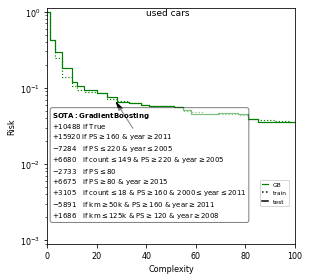

In [8]:
used_cars_boosting_rule2=r"$\bf{SOTA: Gradient Boosting}$"+"""
$+10488$ if True
$+15920$ if PS$\geq$160 & year$\geq$2011
$-7284$   if PS$\leq$220 & year$\leq$2005
$+6680$   if count$\leq$149 & PS$\geq$220 & year$\geq$2005
$-2733$   if PS$\leq$80
$+6675$   if PS$\geq$80 & year$\geq$2015
$+3105$   if count$\leq$18 & PS$\geq$160 & 2000$\leq$year$\leq$2011
$-5891$   if km$\geq$50k & PS$\geq$160 & year$\geq$2011
$+1686$   if km$\leq$125k & PS$\geq$120 & year$\geq$2008"""
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_1_gb_cc28risk0.067.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule2, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.002],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[27, 0.071]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.028]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])


max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3
gpe_boosting_ [0.24333904502491474, 0.13984820905069836, 0.10417314689598901, 0.09394077639790885, 0.08905279325047262, 0.08564925145476089, 0.07090325216387706, 0.06677253381705783, 0.0634197763742015, 0.058815441482922816, 0.05797679402026709, 0.056977798997611115, 0.05572515817611516, 0.05018749919631185, 0.048041700074253846, 0.04578300363084208, 0.045583361008258584, 0.04481753905726182, 0.043854758407366114, 0.03942372756977987, 0.03834803965102027, 0.037571946531319476, 0.036855111971905045, 0.036423241206874096, 0.035995053156968694, 0.03569787323409608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
gpe_boosting_ [0.29282009404014014, 0.17967331528693806, 0.11782709475049565, 0.10715660159400599, 0.09241840289807748, 0.086686894847208, 0.07542587714031367, 0.06432165829533747, 0.

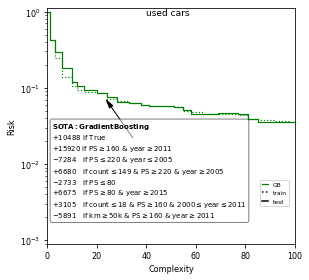

In [9]:
used_cars_boosting_rule2=r"$\bf{SOTA: Gradient Boosting}$"+"""
$+10488$ if True
$+15920$ if PS$\geq$160 & year$\geq$2011
$-7284$   if PS$\leq$220 & year$\leq$2005
$+6680$   if count$\leq$149 & PS$\geq$220 & year$\geq$2005
$-2733$   if PS$\leq$80
$+6675$   if PS$\geq$80 & year$\geq$2015
$+3105$   if count$\leq$18 & PS$\geq$160 & 2000$\leq$year$\leq$2011
$-5891$   if km$\geq$50k & PS$\geq$160 & year$\geq$2011"""
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_1_gb_cc24risk0.071.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule2, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.002],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[23, 0.076]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.021]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])


max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3
gpe_boosting_ [0.24333904502491474, 0.13984820905069836, 0.10417314689598901, 0.09394077639790885, 0.08905279325047262, 0.08564925145476089, 0.07090325216387706, 0.06677253381705783, 0.0634197763742015, 0.058815441482922816, 0.05797679402026709, 0.056977798997611115, 0.05572515817611516, 0.05018749919631185, 0.048041700074253846, 0.04578300363084208, 0.045583361008258584, 0.04481753905726182, 0.043854758407366114, 0.03942372756977987, 0.03834803965102027, 0.037571946531319476, 0.036855111971905045, 0.036423241206874096, 0.035995053156968694, 0.03569787323409608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
gpe_boosting_ [0.29282009404014014, 0.17967331528693806, 0.11782709475049565, 0.10715660159400599, 0.09241840289807748, 0.086686894847208, 0.07542587714031367, 0.06432165829533747, 0.

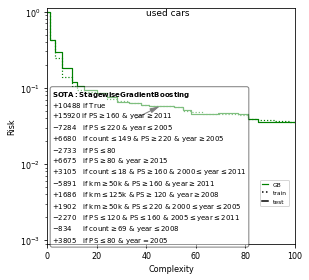

In [10]:
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_2.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.00095],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[46.2, 0.059]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.039]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])

In [11]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=100, title=None, reps=[0,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[]):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, squeeze=False, figsize=(4.4,4))
    for p in range(1):
        ax=axs[0, p]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        max_risk=get_max_risk(dataset_name)
        
        objs = ['gpe','orth']#['mwg','gpe','orth'] if p==0 else ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search=''#'exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
            print(search)
            max_risk = get_max_risk(dataset_name) 
            print('max risk',obj, max_risk)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 30)
                    fc_test=[0]*(50 if p==0 else 30)
                    ands = [0]*(50 if p==0 else 30)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(reps[p] if obj!='mwg' else reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
#         ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], ':', color='purple', linewidth=1.1, where='post')
#         ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
#                  linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
        label_map={'gpe_boosting_':'GB' if p==0 else 'GB', 
                   'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
                  'mwg_boosting_':'GS'}
        for item in train_risks:
            i+=1
            max_risk = get_max_risk(dataset_name) #if 'orth'  in item else 1.1539564110413285
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
            print(item, train_risks[item])
            print(item, test_risks[item])
            print(item, and_counts[item])
            
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
            print(item, 'auc:', aucs[item])
            last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+train_risks[item][:last_index], ':', color=colours[item],
                     linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+test_risks[item][:last_index], color=colours[item],
                     label=label_map[item],linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
        ax.set_xlabel('Complexity', fontsize=8)
        ax.set_xlim(0,max_length)
        if p==0:
            ax.set_ylabel('Risk', fontsize=8)
        ax.set_yscale('log')
        ax.plot([],[], ':', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
#         ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
#                     xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
#                      arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
#                                      connectionstyle="arc3", facecolor='black'))
        ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
                    xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim([0.0009, 1.1])
            ax.legend(handlelength=1, ncol=1,bbox_to_anchor=(legend_locations[p][0],legend_locations[p][1]), prop = { "size": 6 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
        ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=7)
#         ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=7)
#         ax.set_title(dataset_name.replace('_', ' '), fontsize=10)
        ax.text(40,0.9,dataset_name.replace('_', ' '), fontsize=9)
#         ax.grid(visible=True, which='major')
#         ax.grid(visible=True, which='minor')
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs




max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3

max risk orth 194464336.77843493
orth_fc_Newton-CG: avg train risk: 0.14089973692639057 avg test risk 0.1582046844198882 &s: 129.6
gpe_boosting_ [0.24333904502491474, 0.13984820905069836, 0.10417314689598901, 0.09394077639790885, 0.08905279325047262, 0.08564925145476089, 0.07090325216387706, 0.06677253381705783, 0.0634197763742015, 0.058815441482922816, 0.05797679402026709, 0.056977798997611115, 0.05572515817611516, 0.05018749919631185, 0.048041700074253846, 0.04578300363084208, 0.045583361008258584, 0.04481753905726182, 0.043854758407366114, 0.03942372756977987, 0.03834803965102027, 0.037571946531319476, 0.036855111971905045, 0.036423241206874096, 0.035995053156968694, 0.03569787323409608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
gpe_boosting_ [0.29282009404014014, 0.1796733152869

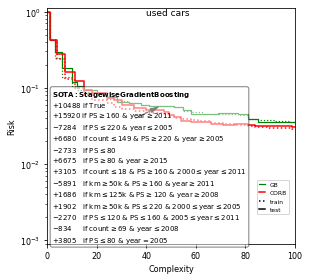

In [12]:
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_3.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.00095],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[46.2, 0.059]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.039]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])

In [13]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=100, title=None, reps=[0,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[]):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, squeeze=False, figsize=(4.4,4))
    for p in range(1):
        ax=axs[0, p]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        max_risk=get_max_risk(dataset_name)
        
        objs = ['gpe','orth']#['mwg','gpe','orth'] if p==0 else ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search=''#'exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
            print(search)
            max_risk = get_max_risk(dataset_name) 
            print('max risk',obj, max_risk)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 30)
                    fc_test=[0]*(50 if p==0 else 30)
                    ands = [0]*(50 if p==0 else 30)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(reps[p] if obj!='mwg' else reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
#         ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], ':', color='purple', linewidth=1.1, where='post')
#         ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
#                  linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
        label_map={'gpe_boosting_':'GB' if p==0 else 'GB', 
                   'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
                  'mwg_boosting_':'GS'}
        for item in train_risks:
            i+=1
            max_risk = get_max_risk(dataset_name) #if 'orth'  in item else 1.1539564110413285
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
            print(item, train_risks[item])
            print(item, test_risks[item])
            print(item, and_counts[item])
            
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
            print(item, 'auc:', aucs[item])
            last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+train_risks[item][:last_index], ':', color=colours[item],
                     linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+test_risks[item][:last_index], color=colours[item],
                     label=label_map[item],linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),where='post')
        ax.set_xlabel('Complexity', fontsize=8)
        ax.set_xlim(0,max_length)
        if p==0:
            ax.set_ylabel('Risk', fontsize=8)
        ax.set_yscale('log')
        ax.plot([],[], ':', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
        ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
                    xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
                    xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim([0.0009, 1.1])
            ax.legend(handlelength=1, ncol=1,bbox_to_anchor=(legend_locations[p][0],legend_locations[p][1]), prop = { "size": 6 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
        ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=7)
        ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=7)
#         ax.set_title(dataset_name.replace('_', ' '), fontsize=10)
        ax.text(40,0.9,dataset_name.replace('_', ' '), fontsize=9)
#         ax.grid(visible=True, which='major')
#         ax.grid(visible=True, which='minor')
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs




max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3

max risk orth 194464336.77843493
orth_fc_Newton-CG: avg train risk: 0.14089973692639057 avg test risk 0.1582046844198882 &s: 129.6
gpe_boosting_ [0.24333904502491474, 0.13984820905069836, 0.10417314689598901, 0.09394077639790885, 0.08905279325047262, 0.08564925145476089, 0.07090325216387706, 0.06677253381705783, 0.0634197763742015, 0.058815441482922816, 0.05797679402026709, 0.056977798997611115, 0.05572515817611516, 0.05018749919631185, 0.048041700074253846, 0.04578300363084208, 0.045583361008258584, 0.04481753905726182, 0.043854758407366114, 0.03942372756977987, 0.03834803965102027, 0.037571946531319476, 0.036855111971905045, 0.036423241206874096, 0.035995053156968694, 0.03569787323409608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
gpe_boosting_ [0.29282009404014014, 0.1796733152869

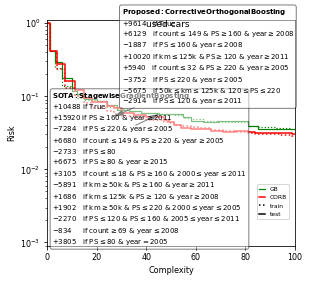

In [14]:
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_4.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.00095],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[46.2, 0.059]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.039]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])

In [15]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=100, title=None, reps=[0,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[]):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True, squeeze=False, figsize=(4.4,4))
    for p in range(1):
        ax=axs[0, p]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        max_risk=get_max_risk(dataset_name)
        
        objs = ['mwg','gpe','orth', ]#['mwg','gpe','orth'] if p==0 else ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search=''#'exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
            print(search)
            max_risk = get_max_risk(dataset_name) 
            print('max risk',obj, max_risk)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 30)
                    fc_test=[0]*(50 if p==0 else 30)
                    ands = [0]*(50 if p==0 else 30)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(reps[p] if obj!='mwg' else reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
        ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], ':', color='purple', linewidth=1.1, where='post')
        ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
                 linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
        label_map={'gpe_boosting_':'SGB' if p==0 else 'SGB', 
                   'orth_fc_Newton-CG': 'COB', 'xgb_keep_': 'SXB', 
                  'mwg_boosting_':'SGS'}
        for item in train_risks:
            i+=1
            max_risk = get_max_risk(dataset_name) #if 'orth'  in item else 1.1539564110413285
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
            print(item, train_risks[item])
            print(item, test_risks[item])
            print(item, and_counts[item])
            
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
            print(item, 'auc:', aucs[item])
            last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+train_risks[item][:last_index], ':', color=colours[item],
                     linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),alpha=0.8,where='post')
            ax.step([0,1]+and_counts[item][:last_index], [1, .42]+test_risks[item][:last_index], color=colours[item],
                     label=label_map[item],linewidth=(1.2 if item!='orth_fc_Newton-CG' else 1.5),alpha=0.8,where='post')
        ax.set_xlabel('Complexity', fontsize=8)
        ax.set_xlim(0,max_length)
        if p==0:
            ax.set_ylabel('Risk', fontsize=8)
        ax.set_yscale('log')
        ax.plot([],[], ':', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
        ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
                    xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
                    xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim([0.0009, 1.1])
            ax.legend(handlelength=1, ncol=1,bbox_to_anchor=(legend_locations[p][0],legend_locations[p][1]), prop = { "size": 6 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
        ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=7)
        ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=7)
#         ax.set_title(dataset_name.replace('_', ' '), fontsize=10)
        ax.text(40,0.9,dataset_name.replace('_', ' '), fontsize=9)
#         ax.grid(visible=True, which='major')
#         ax.grid(visible=True, which='minor')
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs




max risk mwg 194464336.77843493
mwg_boosting_: avg train risk: 0.23581925144940655 avg test risk 0.30235574136513016 &s: 164.7

max risk gpe 194464336.77843493
gpe_boosting_: avg train risk: 0.17251768318030544 avg test risk 0.18422832998826036 &s: 135.3

max risk orth 194464336.77843493
orth_fc_Newton-CG: avg train risk: 0.14089973692639057 avg test risk 0.1582046844198882 &s: 129.6
mwg_boosting_ [0.3243863159623792, 0.17510291630707792, 0.15013193963171145, 0.10921929039389909, 0.09256004752961006, 0.08089571442316375, 0.07854661896760977, 0.07631634383288098, 0.07232481937880562, 0.07125940108810262, 0.06908669829744685, 0.06798289930825724, 0.06357862408274659, 0.06258979272825935, 0.060621813055214295, 0.059758240974593826, 0.058834855167252176, 0.05545175775755321, 0.05412032574013681, 0.05173106847108559, 0.050903814619881624, 0.0505602942356016, 0.05001509485906955, 0.04912483010534368, 0.04867730926200178, 0.047632450551982175, 0.04701187373232052, 0.04596440700573682, 0.0452

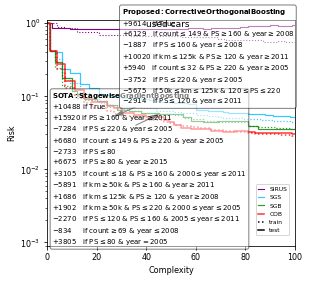

In [16]:
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[0,0], pdfname='figure1_v2_5.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[[[2,0.00095],[30,0.08]],[[2,0.011],[26,0.28]]], 
             arrow_ends=[[[25.9, 0.051],[46.2, 0.059]],[[24, 0.105],[48, 0.108]]], 
             arrow_starts=[[[36, 0.072],[35, 0.039]],[[32, 0.28],[40, 0.055]]],
            legend_locations=[[0.99,0.285],[0.80,0.45]])

In [17]:
1/0

ZeroDivisionError: division by zero

# banknote

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
bank_comp=np.cumsum([2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,2,2,3,2,3,3,3,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3])
bank_train=[1.0000000,0.8457616,0.8554199,0.8402569,0.8336402,0.8407069,0.8430264,0.8432240,0.8476775,
0.8447023,0.8471400,0.8453785,0.8471116,0.8486667,0.8482915,0.8497574,0.8504846,0.8517341,
0.8521353,0.8507546,0.8538248,0.8525157,0.8523542,0.8521450,0.8539293,0.8536963,0.8543751,
0.8546353,0.8538218,0.8539122,0.8499622,0.8527685,0.8516955,0.8519916,0.8528138,0.8508883,
0.8490368,0.8496360,0.8499764,0.8486021,0.8484732,0.8504235,0.8491191,0.8492093,0.8495956,
0.8495205,0.8515217,0.8494077,0.8498719,0.8502503,0.8504190]
bank_test=[1.0000000,0.8457770,0.8563435,0.8415495,0.8356448,0.8431540,0.8453514,0.8455284,0.8498098,
0.8476470,0.8492228,0.8470909,0.8493657,0.8514621,0.8505370,0.8521289,0.8526348,0.8541204,
0.8544173,0.8530394,0.8561517,0.8549817,0.8547452,0.8544461,0.8563708,0.8561704,0.8568506,
0.8570256,0.8565116,0.8566705,0.8524966,0.8554407,0.8542797,0.8545019,0.8555264,0.8532700,
0.8516675,0.8523697,0.8526801,0.8511794,0.8510926,0.8534752,0.8519732,0.8521046,0.8525117,
0.8524180,0.8544382,0.8524735,0.8527148,0.8530158,0.8531612,0.8525395]

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe', 'xgb', 'orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,4.4))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
    plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
             linewidth=1.2, where='post')
    plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
             linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=8)
    plt.ylabel('Risk', fontsize=8)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
    plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
#     plt.title(dataset_name.replace('_', ' '))
    plt.text(40, 0.9,fr"$\bf{dataset_name.replace('_', ' ')}$", fontsize=9)
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_1.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
compare_both(['make_friedman2'], location='../experiment_output_20240113defaultvarreg_exhaustive',
             max_risk=1, repeat=1, col=10, 
             max_length=100, title=None, reps=[0], pdfname='make_friedman2_no_bg_v2_5.pdf', 
             sirus_comps=[sirus_comp], 
             sirus_trains=[sirus_train], 
             sirus_tests=[sirus_test],
             boosting_rules=[boosting_rule], 
             fcogb_rules=[orth_rule],
             text_locations=[[[20,0.05],[2,0.0025], ]], 
             arrow_ends=[[[37, 0.0185], [25, 0.022],]], 
             arrow_starts=[[[28, 0.045],[16, 0.016], ]],
             legend_locations=[[0.9,0.255]],
             ylim=[0.002, 1.05], title_loc=[40,.84])

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
#     plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
#              linewidth=1.2, where='post')
#     plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
#              linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
#     plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
#                  arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
#     plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_2.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe', 'orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
#     plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
#              linewidth=1.2, where='post')
#     plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
#              linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
#     plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
#                  arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
#     plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_3.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe', 'orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
#     plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
#              linewidth=1.2, where='post')
#     plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
#              linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
    plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_4.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [ ]:
def compare_used_cars(dataset_name, location='../experiment_output20231221varreg_new', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['gpe', 'mwg', 'xgb','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search=''#'exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
    plt.step(sirus_comp, sirus_train[:len(sirus_comp)], ':', color='purple', 
             linewidth=1.2, where='post')
    plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
             linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colours={'mwg_boosting_':'deepskyblue','gpe_boosting_':'green',
                'orth_fc_Newton-CG':'red','xgb_keep_':'violet',
                }
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'CORB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
#         color = colors[i]
#         colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
        last_index = and_counts[item].index(0) if 0 in and_counts[item] else -1
        plt.step([0]+and_counts[item][:last_index], [1]+train_risks[item][:last_index], ':', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item][:last_index], [1]+test_risks[item][:last_index], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule=r"$\bf{SOTA: Gradient Boosting}$"+'''
$- 3.03$ if var$\geq$1.24
$+3.47$ if skew$\leq$7.62 & var$\leq$-0.50
$+5.65$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.01$ if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 5.38$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.41$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
$- 3.92$ if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
$- 2.76$ if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
$+5.05$ if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
$- 3.47$ if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = r"$\bf{Proposed: Corrective Orthogonal Boosting}$"+'''
$- 4.80$ if var$\geq$1.24
$+5.20$ if skew$\leq$7.62 & var$\leq$-0.50
$+7.68$ if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
$- 4.36$ if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
$- 6.81$ if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
$+3.34$ if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], ':', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.102), xytext=(32, 0.32), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48.5, 0.115), xytext=(40, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(handlelength=1,bbox_to_anchor=(0.15,0.73),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=6)
    plt.text(25,0.25, orth_rule, bbox=bbox_props, fontsize=6)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
#     plt.grid(visible=True, which='major')
#     plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()

In [ ]:
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_5.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)